In [71]:
import pylab as pl
import numpy as np

from astropy.table import Table

In [72]:
dat = Table.read('/global/cscratch1/sd/mjwilson/DESILBG/W3/hsc-w3.fits')

In [73]:
dat.pprint()

    object_id     object_id_isnull         ra         ...     a_y     a_y_isnull
----------------- ---------------- ------------------ ... ----------- ----------
73979566133084194            False 213.80740573236446 ... 0.014041623      False
73979566133084217            False 213.80616462201965 ... 0.014019769      False
73979566133084383            False 213.81482857527814 ... 0.013910883      False
73979566133084418            False 213.82110909506784 ... 0.013876348      False
73979566133084419            False  213.8652721840338 ... 0.013709062      False
73979566133084583            False 213.78788469937862 ...   0.0138191      False
73979566133084617            False 213.88303298566765 ... 0.013463921      False
73979566133084695            False 213.89460902364635 ... 0.013330585      False
73979566133084879            False 213.87830181683358 ...  0.01338089      False
73979566133084901            False  213.7866411605419 ... 0.013676271      False
              ...           

In [74]:
# dat.dtype.names

In [75]:
def gdrop(cat, imin=18., imax=25.5):
    # https://arxiv.org/pdf/0903.3951.pdf    
    isin       = np.ones(len(cat), dtype=bool)

    cat['g']   = -2.5 * np.log10(1.e-9 * cat['g_cmodel_flux'] / 3630.78)    
    cat['r']   = -2.5 * np.log10(1.e-9 * cat['r_cmodel_flux'] / 3630.78)  
    cat['i']   = -2.5 * np.log10(1.e-9 * cat['i_cmodel_flux'] / 3630.78)  
    
    cat['r-i'] = cat['r'] - cat['i']
    cat['g-r'] = cat['g'] - cat['r']

    # https://arxiv.org/pdf/1704.06004.pdf
    isin &= cat['g-r'] >  1.0
    isin &= cat['r-i'] <  1.0    
    isin &= cat['g-r'] >  1.5 * cat['r-i'] + 0.8
    
    isin  = isin & (cat['i'] > imin)
    isin  = isin & (cat['i'] < imax)
    
    # Catch -99 for ill defined magnitudes
    isin = isin & (cat['g'] > 0.0)
    isin = isin & (cat['r'] > 0.0)
    isin = isin & (cat['i'] > 0.0)
         
    return  isin

In [76]:
gdrops = dat[gdrop(dat)]

<ipython-input-75-f4750a0b4224>:5: RuntimeWarning: divide by zero encountered in log10
  cat['g']   = -2.5 * np.log10(1.e-9 * cat['g_cmodel_flux'] / 3630.78)
<ipython-input-75-f4750a0b4224>:5: RuntimeWarning: invalid value encountered in log10
  cat['g']   = -2.5 * np.log10(1.e-9 * cat['g_cmodel_flux'] / 3630.78)
<ipython-input-75-f4750a0b4224>:6: RuntimeWarning: divide by zero encountered in log10
  cat['r']   = -2.5 * np.log10(1.e-9 * cat['r_cmodel_flux'] / 3630.78)
<ipython-input-75-f4750a0b4224>:6: RuntimeWarning: invalid value encountered in log10
  cat['r']   = -2.5 * np.log10(1.e-9 * cat['r_cmodel_flux'] / 3630.78)
<ipython-input-75-f4750a0b4224>:10: RuntimeWarning: invalid value encountered in subtract
  cat['g-r'] = cat['g'] - cat['r']


In [77]:
gdrops.pprint()

    object_id     object_id_isnull         ra         ...     r-i         g-r   
----------------- ---------------- ------------------ ... ------------ ---------
73979566133084901            False  213.7866411605419 ...   0.10364151 1.4945164
73979566133089198            False 213.79530039704676 ...  -0.44413567 3.9292088
73979566133084502            False 213.81643373212157 ...    0.1121006 1.1644306
73979566133084817            False  213.8371212677953 ... -0.025756836 1.2769108
73979566133089298            False 213.79848687658313 ...   0.06659126 1.3802853
73979570428053469            False 213.80205620143917 ...    0.2876091 1.2925987
73979566133089742            False 213.82906704784966 ...  -0.23791122 1.6490421
73979570428053687            False 213.89218283226512 ...   0.41566277 3.0233345
73979570428053367            False 213.81093315682747 ...   0.15400887 2.8524513
73979566133085342            False  213.8337008285503 ...   0.07037926 1.0550365
              ...           

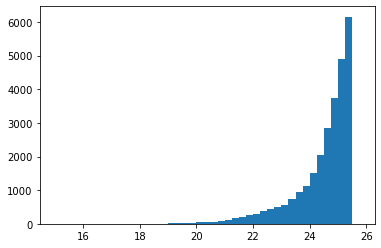

In [78]:
_ = pl.hist(gdrops['i'], bins=np.arange(15.0, 26.0, 0.25))

In [79]:
# dat.dtype.names

(array([1.1591e+04, 2.4000e+01, 2.7000e+01, 5.1900e+02, 3.1450e+03,
        1.2860e+03, 6.7900e+02, 4.0300e+02, 3.3200e+02, 3.5100e+02,
        5.0700e+02, 5.1500e+02, 5.4200e+02, 2.1500e+02, 1.2000e+02,
        6.9000e+01, 2.2000e+01, 1.2000e+01, 1.6000e+01, 9.5000e+01,
        2.1000e+01, 8.0000e+00, 8.0000e+00, 5.0000e+00, 1.8000e+01,
        1.3000e+01, 2.2000e+01, 4.3000e+01, 4.8000e+01, 5.1000e+01,
        6.6000e+01, 9.7000e+01, 2.3900e+02, 3.5100e+02, 8.2100e+02,
        1.2500e+03, 8.4300e+02, 7.3700e+02, 5.5300e+02, 4.7400e+02,
        4.0100e+02, 2.3300e+02, 1.7800e+02, 1.2200e+02, 5.7000e+01,
        1.0000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 2.0000e+00,
        1.0000e+00, 3.0000e+00, 6.0000e+00, 5.0000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
        1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
        2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 

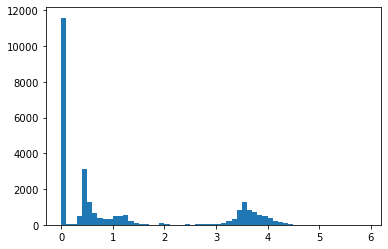

In [81]:
pl.hist(gdrops['miz_zbest'], bins=np.arange(0.0, 6.0, 0.1))